# Prueba 3: Análisis de Sentimiento de Tweeter
## Hito 1
### Training Tweets

● Desarrollar secciones:

○ Preliminares
○ Aspectos Computacionales
○ Análisis Exploratorio
○ Feature Engineering (iniciar desarrollo).

Requerimientos:

● El enunciado debe estar clarificado, considerando el tipo de problema a resolver. Se
deben considerar las librerías a implementar. (1 Punto)

● El tipo de métricas a implementar, ¿Qué estrategia de división de muestras?, ¿Qué
tipo de preprocesamiento se implementará? (2 Puntos)

● Declarar por lo menos cinco modelos con una grilla de hiperparámetros tentativa. (2 Puntos)

● Se debe analizar el comportamiento del vector objetivo. (2 Puntos)

● Se debe reportar el patrón de datos perdidos. (1 Punto)

● Se debe implementar recodificaciones para el vector objetivo. (2 Puntos)

● Entregable: Un notebook con todos los puntos detallados. De ser necesario, un
archivo con extensión .py que contenga todas las funciones auxiliares.


## Preliminares
A continuación se presenta un problema clásico en el análisis de texto: Extraer la polaridad
de sentimiento asociado a un texto.

Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega
como archivo adjunto para esta prueba bajo el nombre de training_tweets.csv.

Para descargar los datos puede ejecutar el siguiente código:
wget
https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv

### Objetivo: Extraer la polaridad de sentimiento asociado a un texto.

El objetivo general es alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.
En este caso se analiza un vector objetivo (Variable dependiente) categórico; la variable "sentiment", que corresponde a una variable categórica binaria, o sea, de 2 niveles (luego de ser recodificada.):
0:𝑃𝑜𝑠𝑡𝑖𝑣e
1:𝑁𝑒𝑔𝑎𝑡𝑖𝑣e

### El Análisis de Predicción es del tipo Clasificación.

La clasificación supervisada es una de las tareas que más frecuentemente son llevadas a cabo por los denominados Sistemas Inteligentes. Por lo tanto, un gran número de paradigmas desarrollados bien por la Estadística (Regresión Logística, Análisis Discriminante) o bien por la Inteligencia Artificial (Redes Neuronales, Inducción de Reglas, Árboles de Decisión, Redes Bayesianas) son capaces de realizar las tareas propias de la clasificación.

Para resolver este problema implementaremos los métodos estadísticos: el Análisis Discriminantes y los K vecinos próximos, y los Arboles de Decisión, las Máquinas Soporte Vector, Redes Neuronales y el Clasificador Bayesiano desarrollados por la Inteligencia Artificial.

Un paso previo a aplicar un método de clasificación, es la partición del conjunto de datos en dos conjuntos de datos más pequeños que serán utilizadas con los siguientes fines: entrenamiento y test .

El subconjunto de datos de entrenamiento es utilizado para estimar los parámetros del modelo y el subconjunto de datos de test se emplea para comprobar el comportamiento del modelo estimado. 

Cada registro de la base de datos debe de aparecer en uno de los dos subconjuntos, y para dividir el conjunto de datos en ambos subconjuntos, se utiliza un procedimiento de muestreo: muestreo aleatorio simple o muestreo estratificado. Lo ideal es entrenar el modelo con un conjunto de datos independiente de los datos con los que realizamos el test.

Como resultado de aplicar un método de clasificación, se cometerán dos errores, en el caso de una variable binaria que toma valores 0 y 1, habrá ceros que se clasifiquen incorrectamente como unos y unos que se clasifiquen incorrectamente como ceros.


### Refinación y Pre-procesamiento de las palabras

Análisis de datos perdidos: Se realiza exploración básica de datos faltantes.

Análisis de Texto: Variable "content" hace referencia al texto del sentimiento de Twitter en cuestión.

POr lo tanto el primer paso que debemos hacer es limpiar toda la información contenida en la columna "content", primero transformar cada frase a letra minúscula y eliminar aquellos signos y números que dificultan el análisis  del texto. Luego se utiliza el parámetro "stop_words" para eliminar aquellas palabras que no aportan al análisis de sentimientos (articulos, preposiciones, conjunciones, etc).
Realizamos la lemantización (la reducción de variadas palabras con un tronco léxico común) para refinar los atributos a capturar.

Posterior a la refinación y preprocesamiento de las palabras, podemos representar
cada oración en una matriz (o corpus) que permitirá reflejar la cantidad de
ocurrencias de cada palabra expresada en el texto. Para ello, haremos uso de las librerías
de preprocesamiento sklearn.feature_extraction.text.CountVectorizer. De esta manera,
tendremos un conjunto de características mediante la frecuencia de ocurrencia de
una palabra o término en el texto.

Realizamos gráficos de barras y wordcloud para visualizar las palabras con mayor ocurrencia posterior a la limpieza de los textos.

### Preparación del vector objetivo y las matrices de entrenamiento y validación:
● Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello
deberá generar la recodificación de cada una de las clases en una de las dos
emociones


### Análisis Exploratorio:

#### Descriptivo:

Se calcularon frecuencias relativas (Porcentaje) de la variable objetivo y de las palabras más comunes de los textos; de esa forma se obtuvieron las distribuciones de las variables de interés.

#### Predictivo:

Finalmente el análisis predictivo responde al objetivo general.
Hay que predecir la polaridad positiva o negativa en cuanto al sentimiento que expresa.
Realizaremos diferentes algoritmos de clasificación predictivos: 5 modelos (algunos solo con diferentes grillas de hiperparámetros).


### MOdelos y Grillas a implementar

1. BernoulliNB: Este clasificador es adecuado para datos discretos y funciona con recuentos de ocurrencias, se elige dado que está especialmente diseñado para funciones binarias / booleanas.

        params = {'alpha': [0,0.1,1],
                  'fit_prior': [True,False]}

2. DecisionTreeClassifier: Los árboles de decisión son modelos predictivos formados por reglas binarias (si/no) con las que se  consigue repartir las observaciones en función de sus atributos y predecir así el valor de la variable respuesta.

        parameters = {"max_depth": [3, 5, 7, 9, 11, 13],
              'criterion': ['gini', 'entropy']}
        params = {'min_samples_split': [5,7,10],
                  'criterion': ['gini', 'entropy'],
                  'max_depth': [10,20,30],
                  'min_samples_leaf':[0.1,0.3,0.5]}
                  
3. AdaBoostClassifier: Este modelo consiste en crear varios predictores sencillos en secuencia, de tal manera que el segundo    ajuste bien lo que el primero no ajustó, que el tercero ajuste un poco mejor lo que el segundo no pudo ajustar y así      sucesivamente.
        
        parameters = {"n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
              "learning_rate": [0.001, 0.01, 0.1, 1.],}

4. LogisticRegression: Método estadístico para predecir clases binarias, si bien es uno de los algoritmos más simples, tambien  es uno de los más utilizados.

        parameters = {"C": [0.001, 0.01, 0.1, 1.],
              "penalty": ["l1", "l2"]}
    
5. RandomForestClassifier: Modelo el cual es una combinación de árboles predictores, construye una larga colección de árboles    no correlacionados y luego los promedia.

        parameters = {"n_estimators": [5, 10, 15, 20, 25], 
              "max_depth": [3, 5, 7, 9, 11, 13]}

#### Métricas de desempeño:
Accuracy (exactitud): Esta métrica apunta a evaluar de manera global el desempeño del modelo. Entrega información de los casos bien clasificados (VP:verdaderos positivos + VN: verdaderos negativos), sobre el total de casos.
𝐴𝑐𝑐𝑢𝑟𝑎𝑐𝑦=𝑉𝑃+𝑉𝑁𝑉𝑃+𝑉𝑁+𝐹𝑃+𝐹𝑁
 
Precisión: Responde a la pregunta ¿Qué proporción de identificaciones positivas fue la correcta?
𝑃𝑟𝑒𝑐𝑖𝑠𝑖ó𝑛=𝑉𝑃𝑉𝑃+𝐹𝑃
 
Recall (sensibilidad): Responde a la pregunta ¿Qué proporción de positivos reales pudo identificar correctamente el modelo confeccionado?
𝑅𝑒𝑐𝑎𝑙𝑙=𝑉𝑃𝑉𝑃+𝐹𝑁
 
F1: Es una métrica que permite obtener un "balance" entre la precisión alcanzada por el modelo y la sensibilidad del mismo.

Curva ROC: Aproximación gráfica para evaluar el desempeño del modelo. Representa la relación entre la tasa de verdaderos positivos (sensibilidad) y la tasa de falsos positivos (1-especificidad).


## Aspectos computacionales

In [161]:
## Aspectos Computacionales
%matplotlib inline
#Librerías importación
import glob, os
#importamos warnings para ignorar los avisos de deprecación
import warnings
warnings.filterwarnings('ignore')

#imprtamos las librerias clásicas para el análisis de datos:
import pandas as pd
import numpy as np
import random
from scipy import stats
# Librería para serialización
import pickle

#Importamos librerias para graficar
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo
from wordcloud import WordCloud
from matplotlib.colors import ListedColormap

#Para este problema importaré re y string que me van a servir para remover todo tipo de puntuación,
#números, carácteres especiaciales
import re #regular expression
import string

#la siguiente librería me permite remover los stopwords
import nltk 
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords

#para hacer la lemantización importaré WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
#con Count vectorizer podremos ver la frecuencia de ocurrencia de las palabras
from sklearn.feature_extraction.text import CountVectorizer
#con TFIDF veremos la frecuencia de ocurrencia del término en la colección de documentos
from sklearn.feature_extraction.text import TfidfVectorizer

#Con train test split haremos las matrices de entrenamiento y validación
from sklearn.model_selection import train_test_split, GridSearchCV

#Librerías de los modelos que utilizaremos
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Para el reporte de métricas
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import  accuracy_score, mean_squared_error, auc

#para importar archivos auxiliares desde otras carpetas
import sys
#sys.path.append('../../utils')
#import funciones2 as fn

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arlen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\arlen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\arlen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
df = pd.read_csv('training_tweets.csv', index_col = 0)
df

,content,sentiment
34723,Happy Mama's day to all mothers,love
17493,@LysdelTellez I am lost. Please help me find a...,worry
20198,"@BoomKatt yes yes I AM, networking whore to th...",happiness
6855,you@snapplynn Wish that would have been your t...,neutral
5924,now i am doing the MicroEconomics project iha...,worry
...,...,...
16469,I do not want to work tomorrow!,sadness
36006,@KandyBee we shuld do a dance like that its s...,fun
22647,"Photo: Got my prints a few days ago, ready for...",happiness
21478,@tove_liden Thanks for the follow Tove!,fun


In [3]:
df.head()
#vector objetivo = sentiment  hay que recodificarlo a positivo y negativo

,content,sentiment
34723,Happy Mama's day to all mothers,love
17493,@LysdelTellez I am lost. Please help me find a...,worry
20198,"@BoomKatt yes yes I AM, networking whore to th...",happiness
6855,you@snapplynn Wish that would have been your t...,neutral
5924,now i am doing the MicroEconomics project iha...,worry


In [4]:
#Revisamos si hay nulos
df.isnull().sum()

content      0
sentiment    0
dtype: int64

In [5]:
#Revisamos el tipo y cantidad de datos con el que trabajaremos:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 34723 to 39364
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    30000 non-null  object
 1   sentiment  30000 non-null  object
dtypes: object(2)
memory usage: 703.1+ KB


Descargué una lista de stopswords en inglés que se encuentra en esta misma carpeta, se llama: stop_words_english.txt. 
Fuente: https://countwordsfree.com/stopwords

Después no la ocupé pero me sirvió como referencia. Por eso decidí dejarla.

In [6]:
#cargamos el archivo de stop words
#stopwords_df = pd.read_csv('stop_words_english.txt', encoding = "ISO-8859-1")

## Preprocesamiento de Datos
 ### Featuring Engineering

Ahora haré una copia del dataframe para modificarlo removiendo todos los simbolos, puntuaciones, números y caracteres especiales

In [7]:
df_clean = df.copy()


In [8]:
#Aplicamos la siguiente función para limpiar los textos de las columnas 'content'
def clean_text(text):
    text = re.sub(r'@[A-Z_a-z_0-9_]+', '', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    text = re.sub(r'#', '', text)   
    text = re.sub('[^A-Za-z0-9]', ' ', text) #con este removemos todo lo que no es letra ni numero
    text = text.lower()
    return text


In [9]:
df_clean['content'] = df['content'].apply(clean_text)
df_clean

,content,sentiment
34723,happy mama s day to all mothers,love
17493,i am lost please help me find a good home,worry
20198,yes yes i am networking whore to the fullest...,happiness
6855,you wish that would have been your tweet after...,neutral
5924,now i am doing the microeconomics project iha...,worry
...,...,...
16469,i do not want to work tomorrow,sadness
36006,we shuld do a dance like that its seriously ...,fun
22647,photo got my prints a few days ago ready for...,happiness
21478,thanks for the follow tove,fun


In [10]:
#Veamos la frecuencia de ocurrencia de palabraas en df_clean
freq_df_clean = pd.Series(' '.join(df_clean['content']).split()).value_counts()[:40] #veremos 40
freq_df_clean

i       18154
to      10753
the      9755
a        7301
my       6022
you      5849
it       5781
and      5647
is       4316
in       4123
for      4018
s        3971
t        3418
of       3340
that     3252
on       3128
me       3092
have     2808
so       2798
but      2582
m        2573
day      2403
just     2369
with     2218
be       2174
at       2037
not      1988
was      1987
all      1760
this     1743
good     1735
can      1693
out      1685
now      1674
up       1601
get      1504
no       1462
like     1444
are      1423
quot     1399
dtype: int64

Como podemos observar la mayoria de las palabras mas repetidas son stop words, por lo tanto, haremos una nueva limpieza eliminando las stop words del df_clean

In [11]:
#Hacemos una copia del df_clean para ahora modificarlo eliminando los stopwords
df_final = df_clean.copy()
df_final

,content,sentiment
34723,happy mama s day to all mothers,love
17493,i am lost please help me find a good home,worry
20198,yes yes i am networking whore to the fullest...,happiness
6855,you wish that would have been your tweet after...,neutral
5924,now i am doing the microeconomics project iha...,worry
...,...,...
16469,i do not want to work tomorrow,sadness
36006,we shuld do a dance like that its seriously ...,fun
22647,photo got my prints a few days ago ready for...,happiness
21478,thanks for the follow tove,fun


LLamaremos "stop" a la lista de stop words presente en la librería NLTK que ya importamos.

In [12]:
stop=stopwords.words('english')
stop[0:10] 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [13]:
#removeré los stopwords del df_clean de la columnna content y generaré una columna nueva content2

df_final['content2'] = df_clean['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [14]:
df_final

,content,sentiment,content2
34723,happy mama s day to all mothers,love,happy mama day mothers
17493,i am lost please help me find a good home,worry,lost please help find good home
20198,yes yes i am networking whore to the fullest...,happiness,yes yes networking whore fullest girl rih next
6855,you wish that would have been your tweet after...,neutral,wish would tweet followed
5924,now i am doing the microeconomics project iha...,worry,microeconomics project ihate subject amp besid...
...,...,...,...
16469,i do not want to work tomorrow,sadness,want work tomorrow
36006,we shuld do a dance like that its seriously ...,fun,shuld dance like seriously best thing haha see...
22647,photo got my prints a few days ago ready for...,happiness,photo got prints days ago ready norskart exhib...
21478,thanks for the follow tove,fun,thanks follow tove


In [15]:
#Haré la lemantización
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

#Agregaré ua columna 'contenido_lematizado' donde de guardará el contenido despues de la lemantización

df_final["contenido_lematizado"]= df_final['content2'].apply(lambda text: lemmatize_words(text))
df_final.head()

,content,sentiment,content2,contenido_lematizado
34723,happy mama s day to all mothers,love,happy mama day mothers,happy mama day mother
17493,i am lost please help me find a good home,worry,lost please help find good home,lost please help find good home
20198,yes yes i am networking whore to the fullest...,happiness,yes yes networking whore fullest girl rih next,yes yes networking whore fullest girl rih next
6855,you wish that would have been your tweet after...,neutral,wish would tweet followed,wish would tweet followed
5924,now i am doing the microeconomics project iha...,worry,microeconomics project ihate subject amp besid...,microeconomics project ihate subject amp besid...


## Análisis Exploratorio

In [16]:
#Veamos las frecuencias de palabras y grafiquemos
freq_df_final = pd.Series(' '.join(df_final['contenido_lematizado']).split()).value_counts()[:20] # for top 20
freq_df_final.sum() #con esto se muestra la cantidad final de palabras distintas, despues de haber lematizado 
# y sacado las stop words

26484

In [17]:
#Acá veremos la frecuencia de cada palabra distinta
freq_df_final

day       2767
good      1736
get       1600
like      1475
go        1446
quot      1399
love      1324
work      1305
today     1279
u         1272
got       1236
time      1190
going     1163
happy     1135
one       1104
lol       1078
know      1045
back      1012
really     979
im         939
dtype: int64

In [18]:
#Con CountVectorizer tambien podemos ver la frecuencia de ocurrencia de cada palabra
vectorizer = CountVectorizer(min_df = 1, max_df = 0.9)

X = vectorizer.fit_transform(df_final['contenido_lematizado'])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences']) #acá lo vemos 
#en forma de probabilidad

In [19]:
print(word_freq_df.sort_values('occurrences',ascending = False).head())

       term  occurrences  frequency
5548    day         2767   0.013228
8751   good         1736   0.008299
8521    get         1600   0.007649
12024  like         1475   0.007051
8697     go         1446   0.006913


ValueError: The number of FixedLocator locations (20), usually from a call to set_ticks, does not match the number of ticklabels (23401).

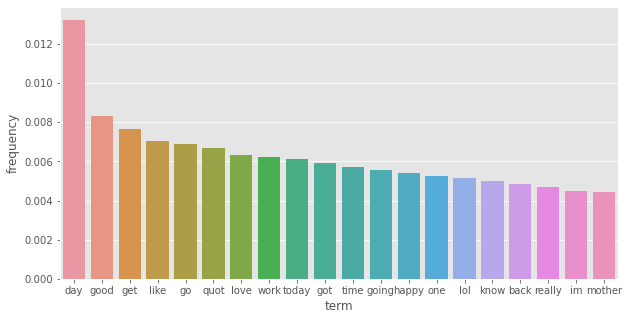

In [20]:
#Ahora graficamos las palabras con mayor frecuencia de ocurrencia
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x="term",y="frequency", data= word_freq_df.sort_values('frequency', ascending = False)[0:20:])
plot.set_xticklabels(rotation=75,labels = word_freq_df.sort_values('frequency', ascending=False).term)
plt.title("Most frequently used words", y = 1.07, fontsize = 17)

In [68]:
#Función para extraer las 100 palabras más repetidas por sentimiento
def word_count_by_sentiment(vectorizer=CountVectorizer(stop_words='english', ngram_range=(1, 2)),
                        df=df_final, target='contenido_lematizado', sentimiento='Positive', sort_n=100):
    tmp_vect = vectorizer
    tmp_fit_transform = tmp_vect.fit_transform(df[df_final['sentimiento'] == sentimiento][target])
    tmp_words = tmp_vect.get_feature_names()
    tmp_frequencies = tmp_fit_transform.toarray().sum(axis=0)
    tmp_df = pd.DataFrame([ list(tmp_words), list(tmp_frequencies) ]).T
    tmp_df.columns = ['words', 'freq']
    tmp_df = tmp_df.sort_values(by='freq', ascending=False).iloc[0:sort_n, :]
    plt.barh(tmp_df['words'],tmp_df['freq']);


In [21]:
#Generamos string_Total para utizarlo en la generación de la word cloud
string_Total = " ".join(df_final['contenido_lematizado'])

Text(0.5, 1.07, 'Wordcloud of the top words')

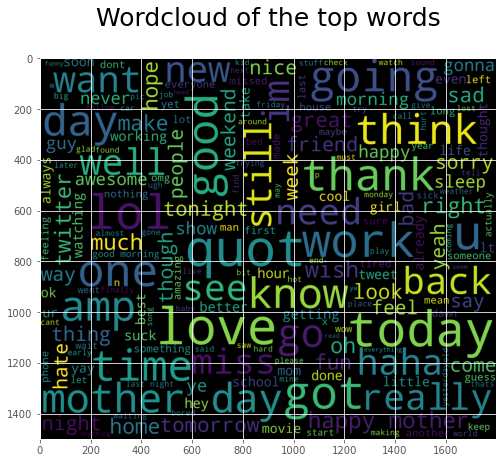

In [22]:
#wordcloud for entire corpus
fig = plt.figure(figsize = (15,7))

wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500, random_state = 10, max_font_size = 200
                ).generate(string_Total)
plt.imshow(wordcloud_stw)
plt.title("Wordcloud of the top words", y=1.07, fontsize=25)

In [23]:
df_final.columns
#ahora voy a modificar la columna sentiment la reemplazaré por sentimiento, donde asignaré positivo y negativo

Index(['content', 'sentiment', 'content2', 'contenido_lematizado'], dtype='object')

In [24]:
#Generamos un diccionario con las palabras que reemplazaré
dic = {'happiness':'positive',
       'love':'positive',
       'surprise':'positive',
       'fun':'positive',
       'relief':'positive',
       'enthusiasm':'positive',
       'worry':'negative',
       'sadness':'negative',
       'hate':'negative',
       'empty':'negative',
       'boredom':'negative',
       'anger':'negative',
       'neutral':'neutral',
        }

In [25]:
#Ahora hacemos la recodificación del vector objetivo
df_final['sentimiento']= df_final.sentiment.replace(dic)
print(df_final.sentimiento.value_counts('%'))

negative    0.400733
positive    0.384233
neutral     0.215033
Name: sentimiento, dtype: float64


Como hay un 21% de neutrales, hay que asignarlos aleatoriamente a positivo o negativo.

In [26]:
#Balanceamos la información
binary = ['negative','positive']
df_final['sentimiento']= [i.replace('neutral', np.random.choice(binary, 1, p=[0.51, 0.49])[0]) for i in df_final['sentimiento']]
print(df_final.sentimiento.value_counts('%'))

negative    0.509633
positive    0.490367
Name: sentimiento, dtype: float64


In [27]:
df_final

,content,sentiment,content2,contenido_lematizado,sentimiento
34723,happy mama s day to all mothers,love,happy mama day mothers,happy mama day mother,positive
17493,i am lost please help me find a good home,worry,lost please help find good home,lost please help find good home,negative
20198,yes yes i am networking whore to the fullest...,happiness,yes yes networking whore fullest girl rih next,yes yes networking whore fullest girl rih next,positive
6855,you wish that would have been your tweet after...,neutral,wish would tweet followed,wish would tweet followed,negative
5924,now i am doing the microeconomics project iha...,worry,microeconomics project ihate subject amp besid...,microeconomics project ihate subject amp besid...,negative
...,...,...,...,...,...
16469,i do not want to work tomorrow,sadness,want work tomorrow,want work tomorrow,negative
36006,we shuld do a dance like that its seriously ...,fun,shuld dance like seriously best thing haha see...,shuld dance like seriously best thing haha see...,positive
22647,photo got my prints a few days ago ready for...,happiness,photo got prints days ago ready norskart exhib...,photo got print day ago ready norskart exhibition,positive
21478,thanks for the follow tove,fun,thanks follow tove,thanks follow tove,positive


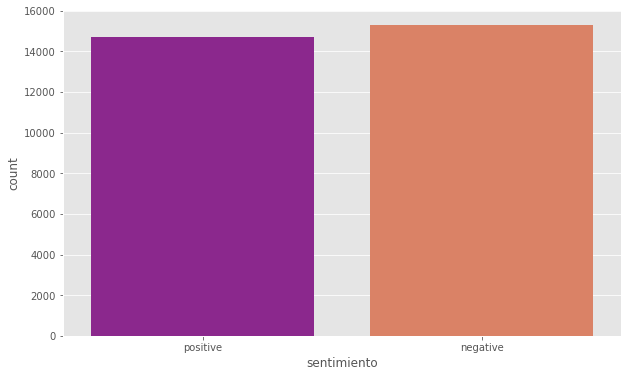

In [42]:
#Vamos a ver como se comporta el vector objetivo gráficamente
sns.countplot(df_final['sentimiento'], palette = 'plasma')
plt.show()

podemos ver que hay más palabras con sentimiento negativo.

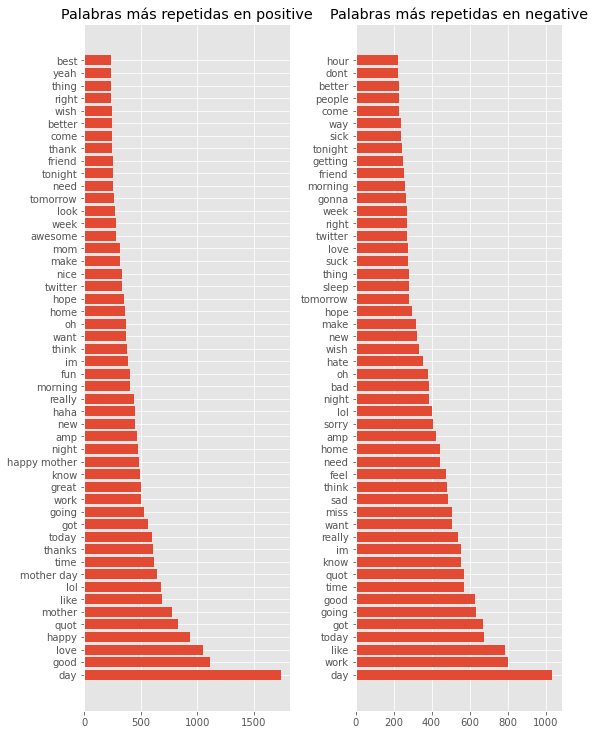

In [77]:
#Gráfica para cada sentimiento
plt.figure(figsize=(8, 20))
for index, c in enumerate(df_final['sentimiento'].unique()):
    plt.subplot(2, 2, index + 1)
    word_count_by_sentiment(sentimiento=c, sort_n=50)
    plt.title(f'Palabras más repetidas en {c}')
    plt.tight_layout()

## Matrices de entrenamiento y validación

In [43]:
#X  = df_final.loc[:,'contenido_lematizado']
y =  df_final['sentimiento']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.33,
                                                    random_state=12238)

In [45]:
X_train

<20100x23401 sparse matrix of type '<class 'numpy.int64'>'
	with 136125 stored elements in Compressed Sparse Row format>

In [46]:
y_train

2974     negative
22598    negative
21842    positive
14042    negative
17632    positive
           ...   
33538    positive
6666     positive
33371    negative
21345    positive
36437    positive
Name: sentimiento, Length: 20100, dtype: object

In [47]:
X_test

<9900x23401 sparse matrix of type '<class 'numpy.int64'>'
	with 67047 stored elements in Compressed Sparse Row format>

In [48]:
y_test

23275    positive
19570    negative
3024     positive
38086    positive
2261     positive
           ...   
1048     negative
19436    negative
11809    negative
21135    positive
38653    positive
Name: sentimiento, Length: 9900, dtype: object

## Implementación de Modelos


In [78]:
# Aquí iremos guardando los mejores scores de cada modelo
score_model = {}

# Modelo 1 BernoulliNB

In [81]:
%%time
parameters = {'alpha': [0,0.1,1],
              'fit_prior': [True,False]}

BN = BernoulliNB()

BN = GridSearchCV(
     BN, 
     parameters, 
     cv=5)

get_model_params_2 = BN.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {get_model_params_2.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{get_model_params_2.best_score_:.3f}'
)
score_model['BernoulliNB'] = get_model_params_2.best_score_.round(3)
print('=='*40)

Best parameters {'alpha': 1, 'fit_prior': False}
Mean cross-validated accuracy score of the best_estimator: 0.669
CPU times: total: 2.08 s
Wall time: 2.35 s


In [84]:
BN = BernoulliNB(alpha=1.0, fit_prior=False).fit(X_train, y_train)
y_hat_BN = BN.predict(X_test)

matriz_BN = confusion_matrix(y_test,y_hat_BN)
matriz_BN

array([[3612, 1425],
       [1786, 3077]], dtype=int64)

In [83]:
reporte_BN = print(classification_report(y_test, y_hat_BN))
reporte_BN

              precision    recall  f1-score   support

    negative       0.67      0.72      0.69      5037
    positive       0.68      0.63      0.66      4863

    accuracy                           0.68      9900
   macro avg       0.68      0.67      0.67      9900
weighted avg       0.68      0.68      0.68      9900



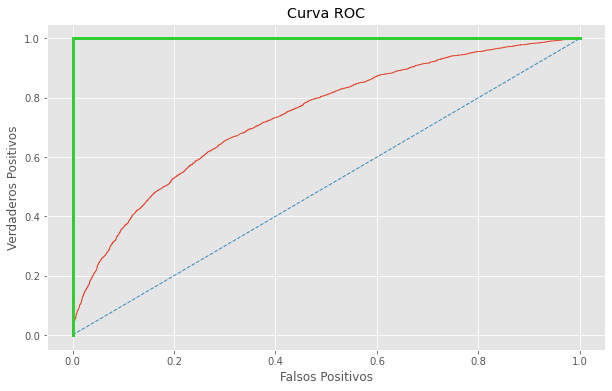

In [95]:
#Graficaremos la curva ROC
yhat_b = get_model_params_2.predict_proba(X_test)[:, 1]
y_test = y_test.map({'positive': 1, 'negative': 0}).astype(int)
false_positive, true_positive, threshold = roc_curve(y_test, yhat_b)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

# MOdelo 2: Decision Tree Classifier

In [135]:
%%time
parameters = {"max_depth": [3, 5, 7, 9, 11, 13],
              'criterion': ['gini', 'entropy']}

DT = DecisionTreeClassifier(
     random_state=12238,
     class_weight='balanced')

DT = GridSearchCV(
     DT, 
     parameters, 
     cv=5)

DT.fit(X_train, y_train)


print('=='*40)
print(f'Best parameters {DT.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{DT.best_score_:.3f}'
)
score_model['DecisionTreeClassifier'] = DT.best_score_.round(3)
print('=='*40)

Best parameters {'criterion': 'gini', 'max_depth': 13}
Mean cross-validated accuracy score of the best_estimator: 0.599
CPU times: total: 56.5 s
Wall time: 56.9 s


In [136]:
DT = DecisionTreeClassifier(criterion='gini',max_depth = 13,random_state=12238,class_weight="balanced").fit(X_train, y_train)
y_hat_DT = DT.predict(X_test)
y_test = y_test.map({'positive': 1, 'negative': 0})

In [137]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer = imp_mean.fit([y_test])
data = imputer.transform([y_test])
print(data)

[[0. 0. 0. ... 0. 0. 0.]]


In [138]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
imputer = imp_mean.fit([y_hat_DT])
data = imputer.transform([y_hat_DT])
print(data)

[['negative' 'positive' 'negative' ... 'negative' 'negative' 'negative']]


In [139]:
reporte_DT = print(classification_report(y_test, y_hat_DT)) 

reporte_DT

ValueError: Input y_true contains NaN.

In [141]:
#Parámetros
params = {'min_samples_split': [5,7,10],
           'criterion': ['gini', 'entropy'],
           'max_depth': [3, 5, 7, 9, 11, 13],
           'min_samples_leaf':[0.1,0.3,0.5]}
#Gridsearch
get_params = GridSearchCV(DecisionTreeClassifier(), params, cv=10, return_train_score=True)

#Entrenamiento
get_params.fit(X_train, y_train)

#Imprime resultados
print(get_params.best_params_)
print(get_params.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 0.1, 'min_samples_split': 5}
0.5100497512437812


In [142]:
#Evaluación
best_dtc = get_params.best_estimator_.fit(X_train, y_train)
print(classification_report(y_test, best_dtc.predict(X_test)))

ValueError: Input y_true contains NaN.

In [143]:
matriz_DT= confusion_matrix(y_test,best_dtc.predict(X_test))
matriz_DT

ValueError: Input y_true contains NaN.

In [144]:
#Graficaremos la curva ROC
yhat_b = get_model_params_2.predict_proba(X_test)[:, 1]
#y_test = y_test.map({'positive': 1, 'negative': 0}).astype(int)
false_positive, true_positive, threshold = roc_curve(y_test, yhat_b)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1], c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

ValueError: Input y_true contains NaN.

# Modelo 3: AdaBoost Classifier

In [145]:
%%time
parameters = {"n_estimators": [5, 10, 15, 20, 25, 50, 75, 100], 
              "learning_rate": [0.001, 0.01, 0.1, 1.],}

AB = AdaBoostClassifier(
     random_state=12238)

AB = GridSearchCV(
     AB, 
     parameters, 
     cv=5)

AB = AB.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {AB.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{AB.best_score_:.3f}'
)
score_model['AdaBoost'] = AB.best_score_.round(3)
print('=='*40)

Best parameters {'learning_rate': 1.0, 'n_estimators': 100}
Mean cross-validated accuracy score of the best_estimator: 0.652
CPU times: total: 1h 16min 36s
Wall time: 1h 18min 15s


In [146]:
AB = AdaBoostClassifier(n_estimators = 100,learning_rate=1.0,random_state=12238).fit(X_train, y_train)
y_hat_AB = AB.predict(X_test)

reporte_AB = print(classification_report(y_test, y_hat_AB)) 
reporte_AB

ValueError: Input y_true contains NaN.

In [147]:
matriz_AB = confusion_matrix(y_test,y_hat_AB)
matriz_AB

ValueError: Input y_true contains NaN.

In [149]:
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_AB)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

ValueError: Input y_true contains NaN.

# MOdelo 4: Logistic Regresion

In [150]:
%%time
parameters = {"C": [0.001, 0.01, 0.1, 1.],
              "penalty": ["l1", "l2"]}

LR = LogisticRegression(
     random_state=12238,
     class_weight="balanced",
     solver="liblinear",
     n_jobs = -1)

LR = GridSearchCV(
     LR, 
     parameters, 
     cv=5)

get_model_params_1 =LR.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {get_model_params_1.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{get_model_params_1.best_score_:.3f}'
)
score_model['LogisticRregression'] = get_model_params_1.best_score_.round(3)
print('=='*40)

Best parameters {'C': 0.1, 'penalty': 'l2'}
Mean cross-validated accuracy score of the best_estimator: 0.673
CPU times: total: 8.83 s
Wall time: 6.58 s


In [151]:
LR = LogisticRegression(C=0.1, penalty= 'l2',class_weight="balanced",solver="liblinear").fit(X_train, y_train)
y_hat_LR = LR.predict(X_test)

reporte_LR = print(classification_report(y_test, y_hat_LR)) 
reporte_LR

ValueError: Input y_true contains NaN.

In [152]:
matriz_LR = confusion_matrix(y_test,y_hat_LR)
matriz_LR

ValueError: Input y_true contains NaN.

In [153]:
false_positive, true_positive, threshold = roc_curve(y_test, y_hat_LR)
plt.title('Curva ROC')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');

ValueError: Input y_true contains NaN.

# Modelo 5: Random Forest Classifier

In [154]:
%%time
parameters = {"n_estimators": [5, 10, 15, 20, 25], 
              "max_depth": [3, 5, 7, 9, 11, 13]}

RF = RandomForestClassifier(
     random_state=12238,
     class_weight='balanced')

RF = GridSearchCV(
     RF, 
     parameters, 
     cv=5)

RF.fit(X_train, y_train)

print('=='*40)
print(f'Best parameters {RF.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{RF.best_score_:.3f}'
)
score_model['Random Rorest'] = RF.best_score_.round(3)
print('=='*40)

Best parameters {'max_depth': 13, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.629
CPU times: total: 2min 6s
Wall time: 2min 10s


In [155]:
models_sort = sorted(score_model.items())
models_sort

[('AdaBoost', 0.652),
 ('BernoulliNB', 0.669),
 ('DecisionTreeClassifier', 0.599),
 ('LogisticRregression', 0.673),
 ('Random Rorest', 0.629)]

In [156]:
def plot_roc(model=DT, y_true=y_test, X_test=X_test, model_label=None):
    """TODO: Docstring for plot_roc.

    :model: TODO
    :y_true: TODO
    :X_test: TODO
    :model_label: TODO
    :returns: TODO

    """
    tmp_y_pred = model.predict_proba(X_test)[:, 1]
    false_positive_rates, true_positive_rates, _ = roc_curve(y_test, tmp_y_pred)
    store_auc = auc(false_positive_rates, true_positive_rates)
    if model_label is not None:
        tmp_label = "{}: {}".format(model_label, round(store_auc,3))
    else:
        tmp_label = None
    plt.plot(false_positive_rates, true_positive_rates, label=tmp_label)
    plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] ,
    c='limegreen', lw=3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

## REporte comparativo

In [157]:
plt.figure(figsize=(16,10))
plot_roc(model=DT, y_true= y_test, X_test=X_test, model_label = "Decision Tree")
plot_roc(model=RF, y_true= y_test, X_test=X_test, model_label = "Random Forest")
plot_roc(model=LR, y_true= y_test, X_test=X_test, model_label = "Logistic Regression")
plot_roc(model=AB ,y_true= y_test, X_test=X_test, model_label = "AdaBoost")
plot_roc(model=BN ,y_true= y_test, X_test=X_test, model_label = "BernoulliNB")
plt.plot([0, 1], ls="--")
plt.legend(loc='center left', bbox_to_anchor=(1, .5));

ValueError: Input y_true contains NaN.

<Figure size 1152x720 with 0 Axes>

In [158]:
Models = [AB,BN,LR,DT,RF]

for model in Models:
    y_hat = model.predict(X_test)
    print(model)
    print('\n')
    print(classification_report(y_test, y_hat))
    print(f'Confusion matrix --> {model}')
    print(confusion_matrix(y_test,y_hat))
    print('=='*40)

AdaBoostClassifier(n_estimators=100, random_state=12238)




ValueError: Input y_true contains NaN.

## Serialización

In [162]:
pickle.dump(X_train, open('X_train.sav', 'wb'))
pickle.dump(X_test, open('X_test.sav', 'wb'))
pickle.dump(y_train, open('y_train.sav', 'wb'))
pickle.dump(y_test, open('y_test.sav', 'wb'))

In [163]:
pickle.dump(get_model_params_1.best_estimator_, open('modelo_LR.sav', 'wb'))
pickle.dump(get_model_params_2.best_estimator_, open('modelo_BN.sav', 'wb'))